## Red Neuronal MultiCapa, OOP model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importar Images

In [2]:
from get_images import get_images

In [3]:
# MNIST path
mnist_path = './mnist_raw/'
x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)

# Extraemos los primeros 5k datos, y los reagrupamos en 5k filas,y comlumnas como el producto flotante de 28*28 (por eso el -1)
x_train = x_train_num[:50000].reshape(50000, -1).astype(float)
y_train = y_train_num[:50000].reshape(50000, 1) # Extraemos 5k datos y los formatemaos en 5k filas y una sola columna.
# Validation Set
x_val = x_train_num[50000:].reshape(10000, -1).astype(float)
y_val = y_train_num[50000:].reshape(10000, 1)
# Set de pruebas
x_test = x_test_num.copy().reshape(10000, -1).astype(float)
y_test = y_test_num.copy().reshape(10000, 1)


### Hasta este punto tenemos 3 sets
- Un set de Entrenamiento   $\to$ Es el set mas grande y son los datos para entrenar el modelo
- Un set de validación      $\to$ Es para afinar el modelo y ver que tan bien esta funcionando
- Un Set de Pruebas         $\to$ Sera la prueba final del modelo.

In [4]:
x_train.mean(), x_train.std(), x_train.min()

(33.39512885204082, 78.6661972212754, 0.0)

### Para normalizar los datos
### $\frac{X_{\text{data}}-X_{\text{mean}}}{X_{\text{std}}}$

In [6]:
def normalise(x_mean, x_std, x_data): # Función para normalizar los datos
    return (x_data - x_mean) / x_std

In [7]:
x_mean = x_train.mean() # sacamos la media
x_std = x_train.std()   # sacamos el std

# Normalizamos nuestros Set's de datos
x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [8]:
x_train.mean(), x_train.std() # Nos quedamos con una media muy pequeña y un STD sercano a 1

(-9.646705203355238e-18, 0.9999999999999997)

### Graficar muestras

In [9]:
def plot_number(image): # Grafica un numero 
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: 2


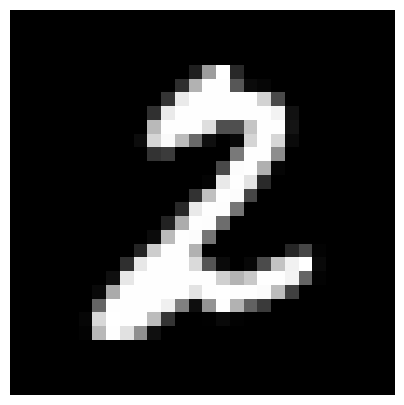

In [11]:
# Grafica un numero random
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx, 0]}')
plot_number(x_test_num[rnd_idx])

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle: 
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]  
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Init parameters

In [ ]:
def init_parameters(input_size,neurons):
    
    W1 = np.random.randn(neurons[0], input_size)*0.001
    b1 = np.zeros((neurons[0],1))
    
    W2 = np.random.randn(neurons[1],neurons[0]*0.001)
    b2 = np.zeros((neurons[1],1))
    
    return{'W1':W1,'b1':}

## Nuestra clase Linear, ReLU y Sequential

In [ ]:
class np_tensor(np.ndarray): pass

In [ ]:
a = np.array([0, 0])
b = a.view(np_tensor)

In [ ]:
type(a)

In [ ]:
type(b)

In [ ]:
a == b

In [ ]:
a is b

###  Clase Linear

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        pass
    def __call__(self, X): # esta el foward de la clase lineal
        pass
    def backward(self, X, Z):
        pass

### Clase ReLU

In [ ]:
class ReLU():
    def __call__(self, Z):
        pass
    def backward(self, Z, A):
        pass

### Clase Sequential

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        pass
    def __call__(self, X):
        pass
    def backward(self):
        pass
    def update(self, learning_rate = 1e-3):
        pass
    def predict(self, X):
        pass         

### Cost Function

In [ ]:
def softmaxXEntropy(x, y):
    pass

### Loop de entrenamiento

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    pass

In [ ]:
def accuracy(x, y, mb_size):
    pass

In [ ]:
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 10)])
mb_size = 512
learning_rate = 1e-4
epochs = 20


In [ ]:
train(model, epochs, mb_size, learning_rate)

In [ ]:
print(accuracy(x_test, y_test, mb_size))

In [ ]:
idx = np.random.randint(len(y_test))
plot_number(x_test_num[idx])
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {pred}, el valor real es:{y_test[idx][0]}')

In [ ]:
a = [33, 44, 555, 666]

In [ ]:
for i in reversed(range(len(a))):
    print(a[i])